<a href="https://colab.research.google.com/github/SayyedAsifRizvi/Analyzing-google-apps-store/blob/main/Business_Case_Study%20%3AAerofit_Treadmill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Aerofit - Descriptive Statistics & Probability

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import copy

In [ ]:
df_treadmill=pd.read_csv("aerofit_treadmill.csv")

In [ ]:
df_treadmill.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df_treadmill.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
df_treadmill.shape

(180, 9)

In [ ]:
print(f"Number of rows: {df_treadmill.shape[0]}\nNumber of columns: {df_treadmill.shape[1]}")

Number of rows: 180
Number of columns: 9


In [ ]:
df_treadmill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Insights**


1.   From the above analysis, it is clear that, data has total of 9
features with mixed alpha numeric data. Also we can see that there is no missing data in the columns.
2.   The data type of all the columns are matching with the data present inthem. But we will change the datatype of Usage and Fitness into str(object).

In [ ]:
df_treadmill.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Observations:**

 * There are 3 unique products in the dataset.
 * KP281 is the most frequent product.
 * Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and
   75% of persons have age less than or equal to 33.
 * Most of the people are having 16 years of education i.e. 75% of
   persons are having education <= 16 years.
 * Out of 180 data points, 104's gender is Male and rest are the    
   female.
 * Standard deviation for Income & Miles is very high. These variables
   might have the outliers in it.

In [ ]:
df_treadmill.duplicated().value_counts()

,count
False,180


**Observations:**
  1.   There are no missing values in the data.

#Product Distribution

In [ ]:
df_treadmill['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

**There are 3 unique products available in the dataset.**

# Sanity Check for columns

In [ ]:
# checking the unique values for columns
for i in df_treadmill.columns:
    print('Unique Values in',i,'column are :-')
    print(df_treadmill[i].unique())
    print('-'*70)

Unique Values in Product column are :-
['KP281' 'KP481' 'KP781']
----------------------------------------------------------------------
Unique Values in Age column are :-
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
----------------------------------------------------------------------
Unique Values in Gender column are :-
['Male' 'Female']
----------------------------------------------------------------------
Unique Values in Education column are :-
[14 15 12 13 16 18 20 21]
----------------------------------------------------------------------
Unique Values in MaritalStatus column are :-
['Single' 'Partnered']
----------------------------------------------------------------------
Unique Values in Usage column are :-
[3 2 4 5 6 7]
----------------------------------------------------------------------
Unique Values in Fitness column are :-
[4 3 2 1 5]
----------------------------------------------------------------------
Unique Valu

**Insights**

The dataset does not contain any abnormal values.

# Non-Graphical Analysis: Value counts and unique attributes

##Value counts and unique attributes of Product column

In [ ]:
product_distribution = pd.crosstab(index=df_treadmill['Product'], columns='count')
product_percentage_distribution = (product_distribution / len(df_treadmill)) * 100

product_distribution

col_0,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
print("Product Distribution:")
print(product_distribution)
print("\nPercentage Distribution:")
print(product_percentage_distribution)

Product Distribution:
col_0    count
Product       
KP281       80
KP481       60
KP781       40

Percentage Distribution:
col_0        count
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222



**Insight**:
Top selling product is KP281 with 80 units sold which comprises 44.44% of total sales. Least selling product is KP781 with 40 units sold which comprises 22.22% of total sales.

##Value counts and unique attributes of Age column

In [ ]:
print(df_treadmill['Age'].value_counts())
print("\nUnique attributes of Age:")
print(df_treadmill["Age"].unique())

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64

Unique attributes of Age:
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


**Insight: Most number of purchases are made by customers which fall under age range of 23 - 26.**

##Value counts and unique attributes of Gender column

In [ ]:
genderdst=pd.crosstab(index=df_treadmill['Gender'],columns='count')
perc_gender_dst=(genderdst/len(df_treadmill))*100
print("Gender Distribution:")
print(genderdst)
print("\nPercentage Distribution:")
print(perc_gender_dst.round(2))

Gender Distribution:
col_0   count
Gender       
Female     76
Male      104

Percentage Distribution:
col_0   count
Gender       
Female  42.22
Male    57.78


**Insight: 57.78% of our total customers are males and 42.22% are females.**

##Value counts and unique attributes of Education column

In [ ]:
edu_dst=pd.crosstab(index=df_treadmill['Education'],columns='count')
perc_educ_dst=(edu_dst/len(df_treadmill))*100
print("Education Distribution:")
print(edu_dst)
print("\nPercentage Distribution:")
print(perc_educ_dst.round(2))

Education Distribution:
col_0      count
Education       
12             3
13             5
14            55
15             5
16            85
18            23
20             1
21             3

Percentage Distribution:
col_0      count
Education       
12          1.67
13          2.78
14         30.56
15          2.78
16         47.22
18         12.78
20          0.56
21          1.67



**Insight: Majority of our customers are having moderate level of education, which is 10+2+4(Masteror pHD)**

##Value counts and unique attributes of MaritalStatus column

In [ ]:
df_treadmill["MaritalStatus"].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
print(df_treadmill["MaritalStatus"].unique())

['Single' 'Partnered']


**Insight: Most number of purchases is made by customers who are married.**

##Value counts and unique attributes of Usage column

In [ ]:
print("Total count of Usage:")
print(df_treadmill["Usage"].value_counts())

print("\nUnique attributes of Usage:")
print(df_treadmill["Usage"].unique())

Total count of Usage:
Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

Unique attributes of Usage:
[3 2 4 5 6 7]


**Insight: Most of our customers intend to use treadmill 3 - 4 times a week.**

##Value counts and unique attributes of Fitness column

In [ ]:
print("Total count of Fitness:")
print(df_treadmill["Fitness"].value_counts())

print("\nUnique attributes of Fitness:")
print(df_treadmill["Fitness"].unique())

Total count of Fitness:
Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

Unique attributes of Fitness:
[4 3 2 1 5]


**Insight: Most of our customers have moderate level of fitness.**

##Value counts and unique attributes of Income column

In [ ]:
print("Total count of Income:")
print(df_treadmill["Income"].value_counts())

print("\nUnique attributes of Income:")
print(df_treadmill["Income"].unique())

Total count of Income:
Income
45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: count, Length: 62, dtype: int64

Unique attributes of Income:
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]


**Insight: Most of our customers fall in 40,000 - 60,000 dollars annual income bracket.**

## Value counts and unique attributes of Miles column

In [ ]:
print("Total count of Miles:")
print(df_treadmill["Miles"].value_counts().head(4))

print("\nUnique attributes of Miles:")
print(df_treadmill["Miles"].unique())

Total count of Miles:
Miles
85    27
95    12
66    10
75    10
Name: count, dtype: int64

Unique attributes of Miles:
[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


**Insight: Most of our customers intend to use walk/run 75 - 85 number of miles each week**

# Visual Analysis - Univariate & Bivariate

## Univariate Analysis

Understanding the distribution of the data for the quantitative

1.   attributes:
2.   Age
3.   Education
4.   Usage
5.   Fitness
6.   Income
7.   Miles

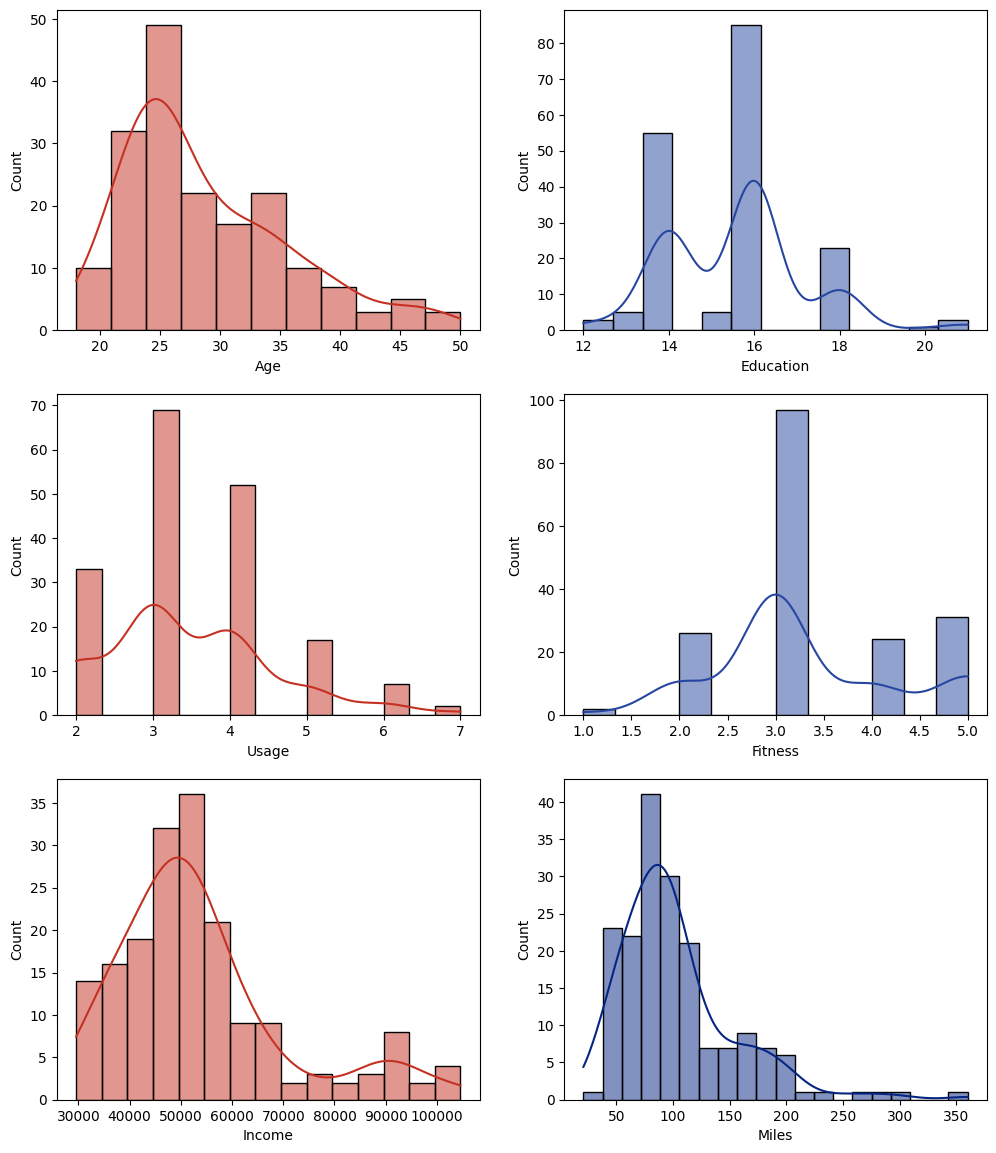

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df_treadmill, x="Age", kde=True, ax=axis[0,0],color='#c43123')
sns.histplot(data=df_treadmill, x="Education", kde=True, ax=axis[0,1],color='#2746a1')
sns.histplot(data=df_treadmill, x="Usage", kde=True, ax=axis[1,0],color='#c43123')
sns.histplot(data=df_treadmill, x="Fitness", kde=True, ax=axis[1,1],color='#2746a1')
sns.histplot(data=df_treadmill, x="Income", kde=True, ax=axis[2,0],color='#c43123')
sns.histplot(data=df_treadmill, x="Miles", kde=True, ax=axis[2,1],color='#052582')
plt.show()

##Outliers detection using BoxPlots

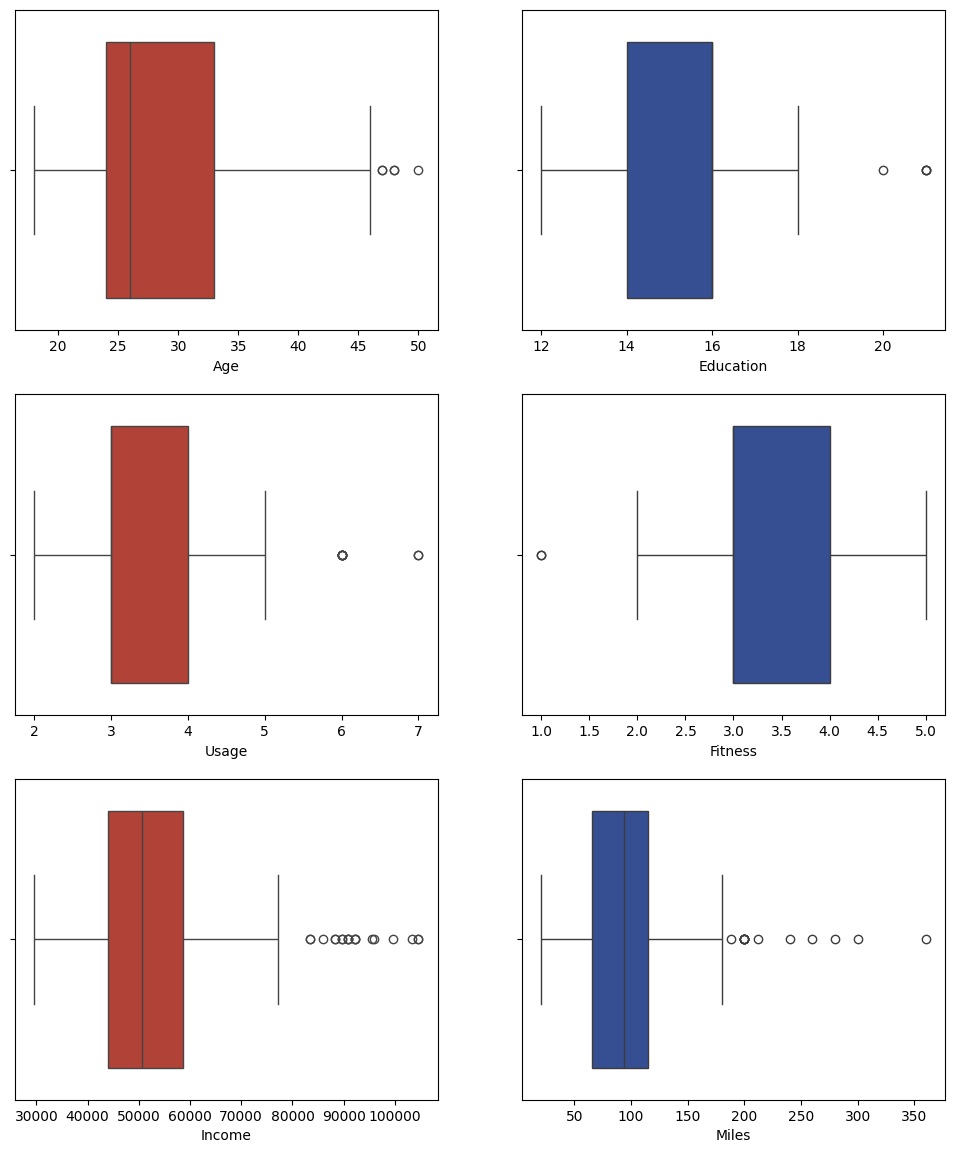

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df_treadmill, x="Age", orient='h', ax=axis[0,0],color='#c43123')
sns.boxplot(data=df_treadmill, x="Education", orient='h', ax=axis[0,1],color='#2746a1')
sns.boxplot(data=df_treadmill, x="Usage", orient='h', ax=axis[1,0],color='#c43123')
sns.boxplot(data=df_treadmill, x="Fitness", orient='h', ax=axis[1,1],color='#2746a1')
sns.boxplot(data=df_treadmill, x="Income", orient='h', ax=axis[2,0],color='#c43123')
sns.boxplot(data=df_treadmill, x="Miles", orient='h', ax=axis[2,1],color='#2746a1')
plt.show()

**Obervation**

**Even from the boxplots it is quite clear that:**
1.   **Age, Education and Usage are having very few outliers**
2.   **While Income and Miles are having more outliers**

##Marginal Probability

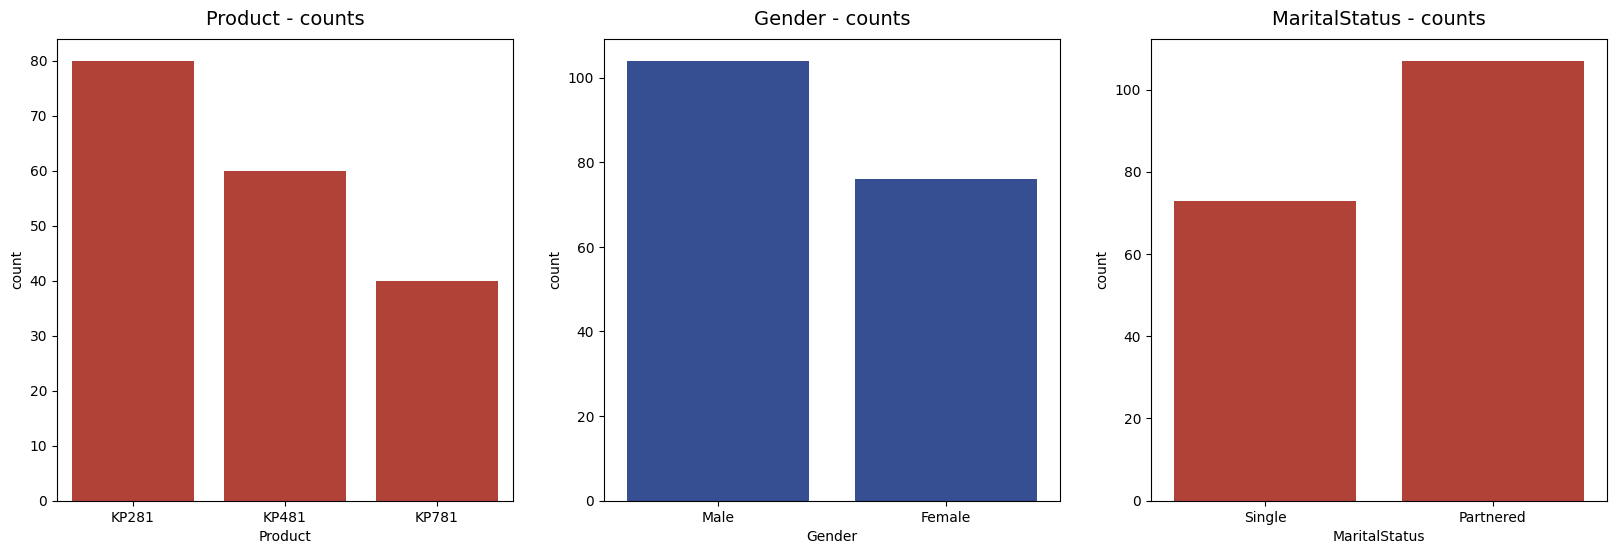

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
color={'#c43123','#2746a1','#bec5d1'}
sns.countplot(data=df_treadmill, x='Product', ax=axs[0],color='#c43123')
sns.countplot(data=df_treadmill, x='Gender', ax=axs[1],color='#2746a1')
sns.countplot(data=df_treadmill, x='MaritalStatus', ax=axs[2],color='#c43123')

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

**KP281 is the most frequent product.**

**Thare are more Males in the data than Females.**

**More Partnered persons are there in the data.**


**Obervations**

**Product**
  * 44.44% of the customers have purchased KP2821 product.
  * 33.33% of the customers have purchased KP481 product.
  * 22.22% of the customers have purchased KP781 product.

**Gender**
    57.78% of the customers are Male.

**MaritalStatus**
    59.44% of the customers are Partnered.

# Bivariate Analysis

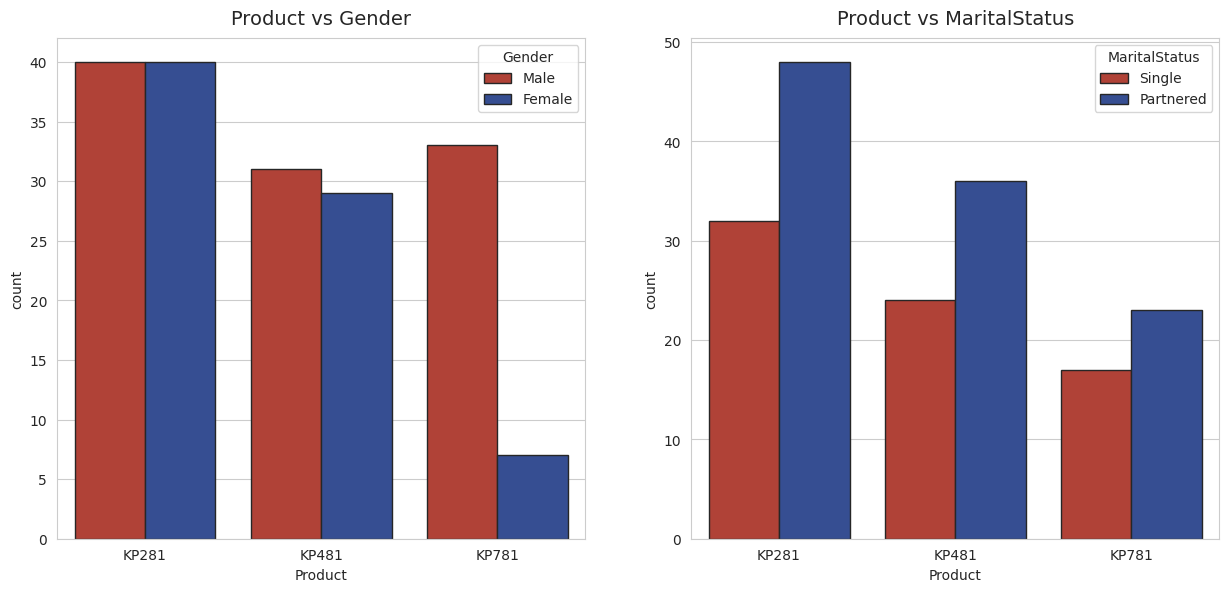

In [ ]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
color={'#c43123','#2746a1'}
sns.countplot(data=df_treadmill, x='Product', hue='Gender', edgecolor="0.15", palette=['#c43123','#2746a1'], ax=axs[0])
sns.countplot(data=df_treadmill, x='Product', hue='MaritalStatus', edgecolor="0.15", palette=['#c43123','#2746a1'], ax=axs[1],color=color)
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

**Obervations**

**Product vs Gender**
1. **Equal number of males and females have purchased KP281 product and Almost same for the product KP481**
2. **Most of the Male customers have purchased the KP781 product.
Product vs MaritalStatus**
3. **Customer who is Partnered, is more likely to purchase the product.**

##Checking the effect of Age on the product purchased

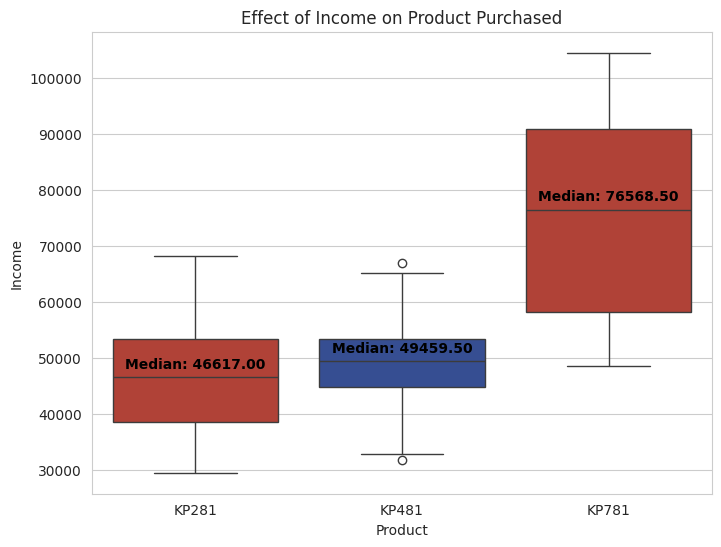

In [ ]:
plt.figure(figsize=(8, 6))

# Boxplot for Income and Product Purchased
ax = sns.boxplot(x='Product', y='Income', data=df_treadmill , palette=['#c43123','#2746a1'])
plt.title('Effect of Income on Product Purchased')

# Annotate median
for product in df_treadmill['Product'].unique():
    box_data = df_treadmill[df_treadmill['Product'] == product]['Income']
    median = box_data.median()

    vertical_offset = ax.get_ylim()[1] * 0.015  # adjust this based on your preference

    ax.text(df_treadmill['Product'].unique().tolist().index(product), median + vertical_offset,
            f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='semibold')


plt.show()

**Insight:**

**Most of our KP281 and KP481 customers fall in 40,000 - 55,000 dollars annual income bracket**

**Most of our KP781 customers fall in 60,000 - 90,000 dollars annual income bracket.**

## Checking the effect of Education on the product purchased

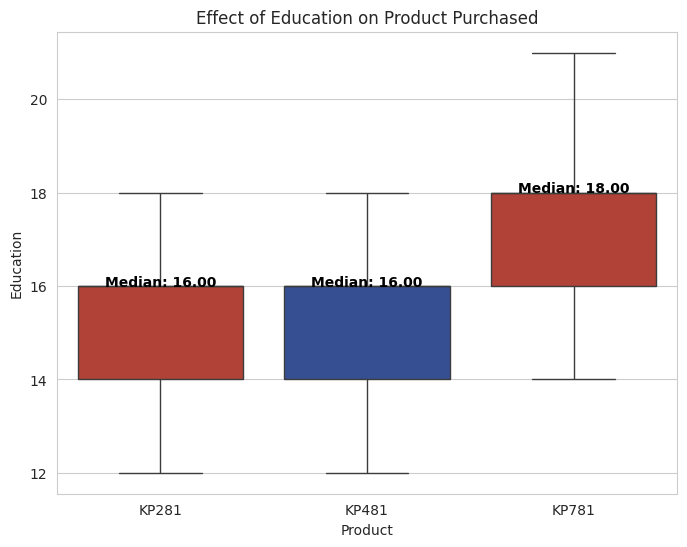

In [ ]:
plt.figure(figsize=(8, 6))

# Boxplot for Education and Product Purchased
ax = sns.boxplot(x='Product', y='Education', data=df_treadmill , palette=['#c43123','#2746a1'])
plt.title('Effect of Education on Product Purchased')

# Annotate median
for product in df_treadmill['Product'].unique():
    box_data = df_treadmill[df_treadmill['Product'] == product]['Education']
    median = box_data.median()

    #vertical_offset = ax.get_ylim()[0] * 0.00030 # adjust this based on your preference

    ax.text(df_treadmill['Product'].unique().tolist().index(product), median ,
            f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='semibold')

plt.show()

**Insight: For KP281 and KP481 our customer's education level is moderate. For KP781 our customer's education level is moderate to high.**

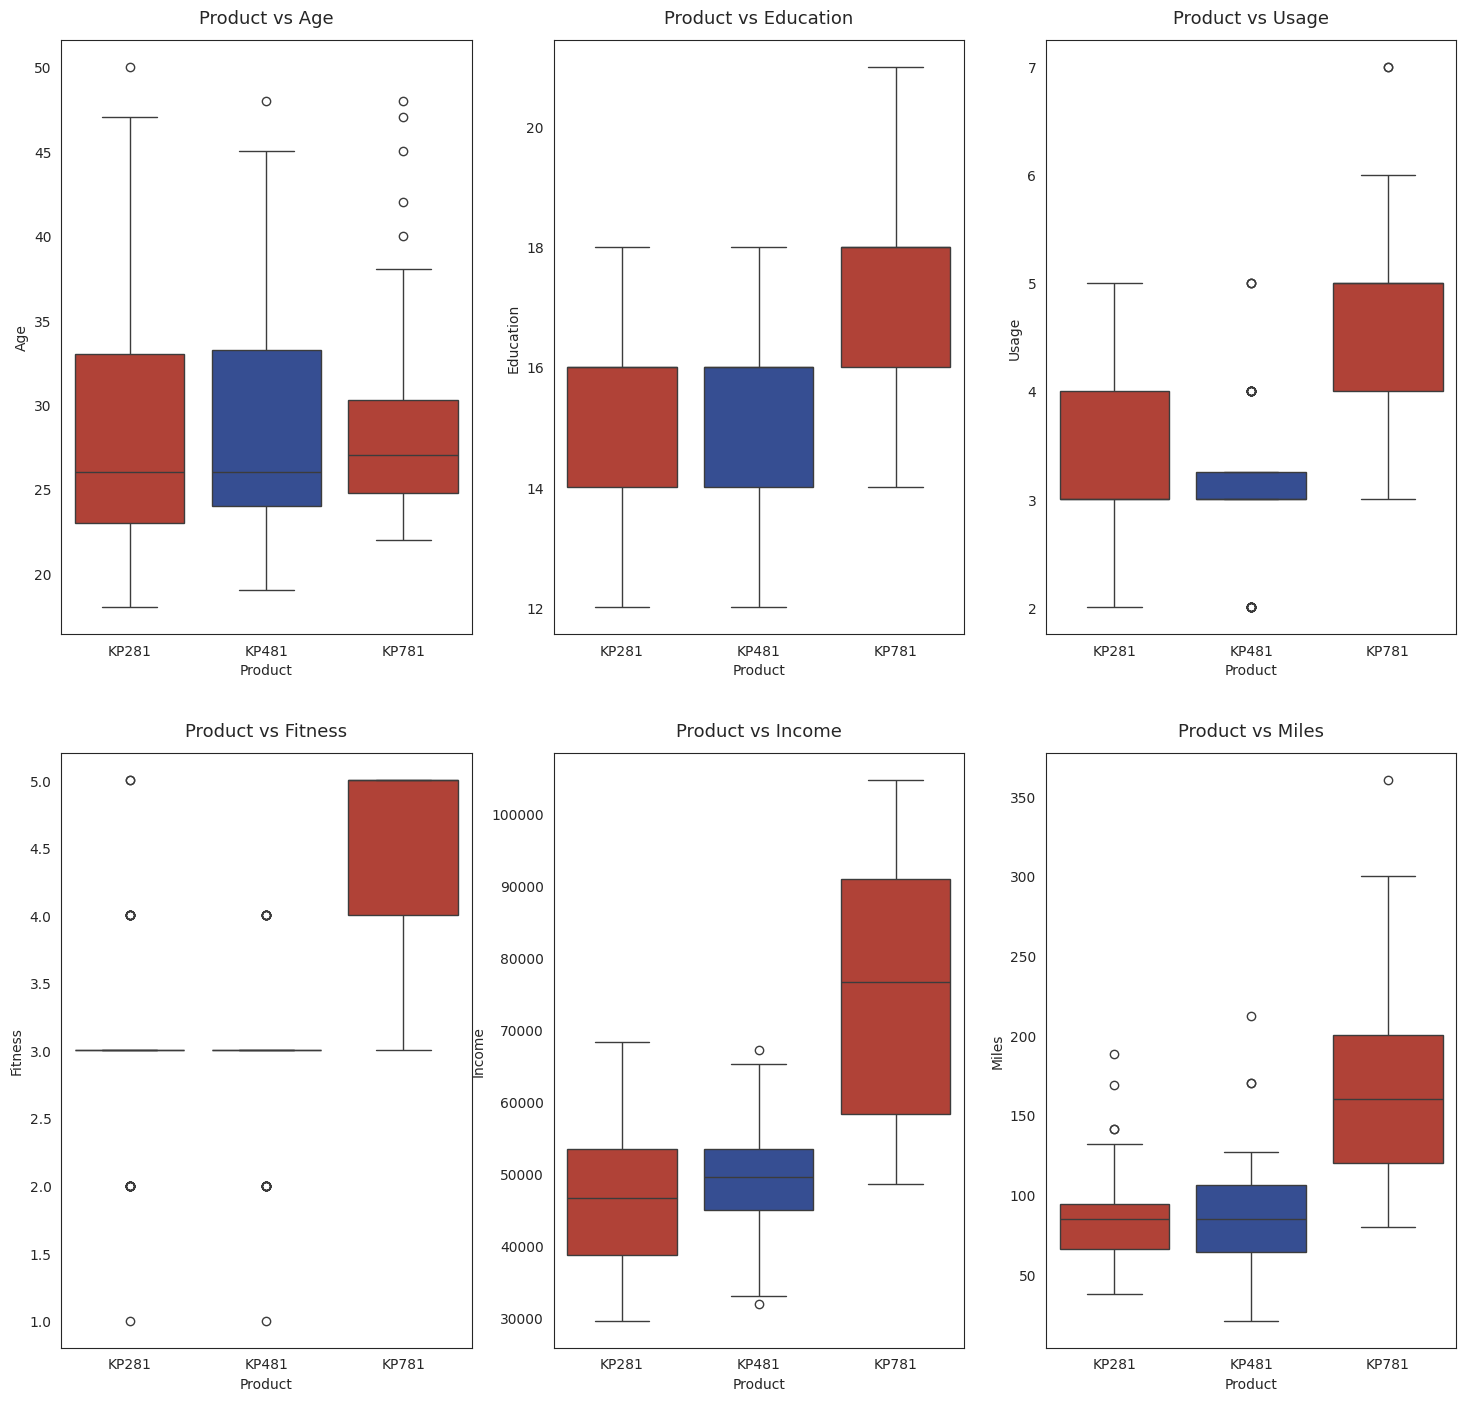

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df_treadmill, x='Product', y=attrs[count], ax=axs[i,j], palette=['#c43123','#2746a1'])
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

**Observations**

**Product vs Age**

1. **Customers purchasing products KP281 & KP481 are having same Age median value.**
2. **Customers whose age lies between 25-30, are more likely to buy KP781 product**

**Product vs Education**

1. **Customers whose Education is greater than 16, have more chances to purchase the KP781 product.**
2. **While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.**

**Product vs Usage**

1. **Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.(High End product)**
2. **While the other customers are likely to purchasing KP281 or KP481(Lower end Product).**

**Product vs Fitness**

1. **The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.**

**Product vs Income**

1. **Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.**

**Product vs Miles**

1. **If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product**

##Age vs. Income

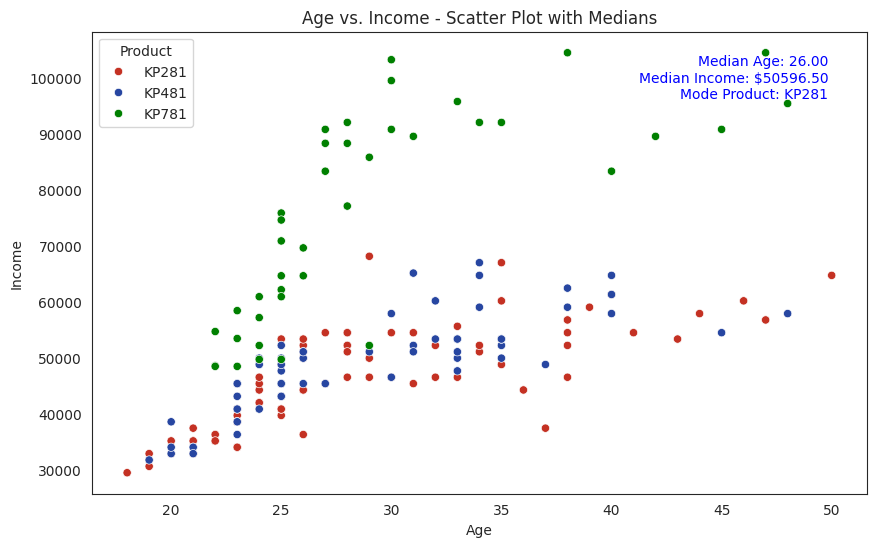

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_treadmill, x='Age',y='Income',hue='Product',palette=['#c43123','#2746a1','g'])

# Median age and income
median_age = df_treadmill['Age'].median()
median_income = df_treadmill['Income'].median()
median_product = df_treadmill['Product'].mode()[0]
# Display medians in the top right corner
plt.text(0.95, 0.95, f'Median Age: {median_age:.2f}\nMedian Income: ${median_income:.2f}\nMode Product: {median_product}',
         transform=plt.gca().transAxes, fontsize=10, color='blue', ha='right', va='top')

plt.title('Age vs. Income - Scatter Plot with Medians')
plt.show()

## Product vs. Usage

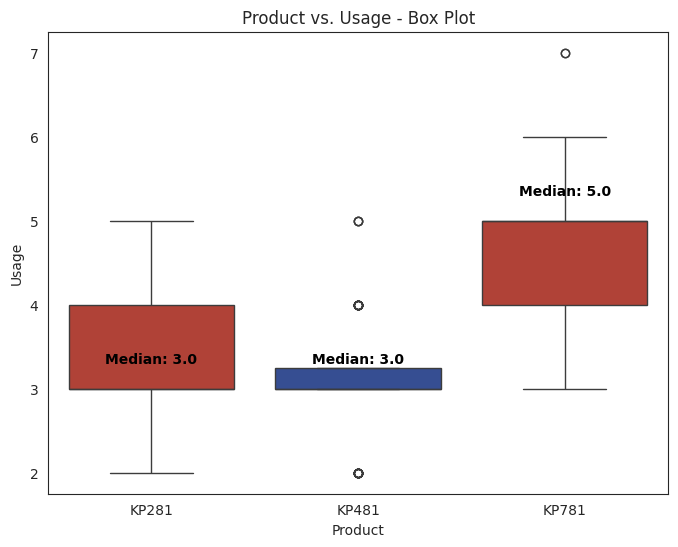

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Product', y='Usage', data=df_treadmill,palette=['#c43123','#2746a1'])

# Annotate median usage for each box
medians = df_treadmill.groupby('Product')['Usage'].median()
vertical_offset = df_treadmill['Usage'].median() * 0.1  # adjust this value for vertical spacing
for xtick, median in zip(ax.get_xticks(), medians):
    ax.text(xtick, median + vertical_offset, f'Median: {median}',
            horizontalalignment='center', color='black', weight='bold')

plt.title('Product vs. Usage - Box Plot')
plt.show()

**Insight: For KP281 our customers are mostly casual users. For KP481 our customers are mostly active to moderate users. For KP781 our customers are mostly athletes or active fitness enthusiasts.**

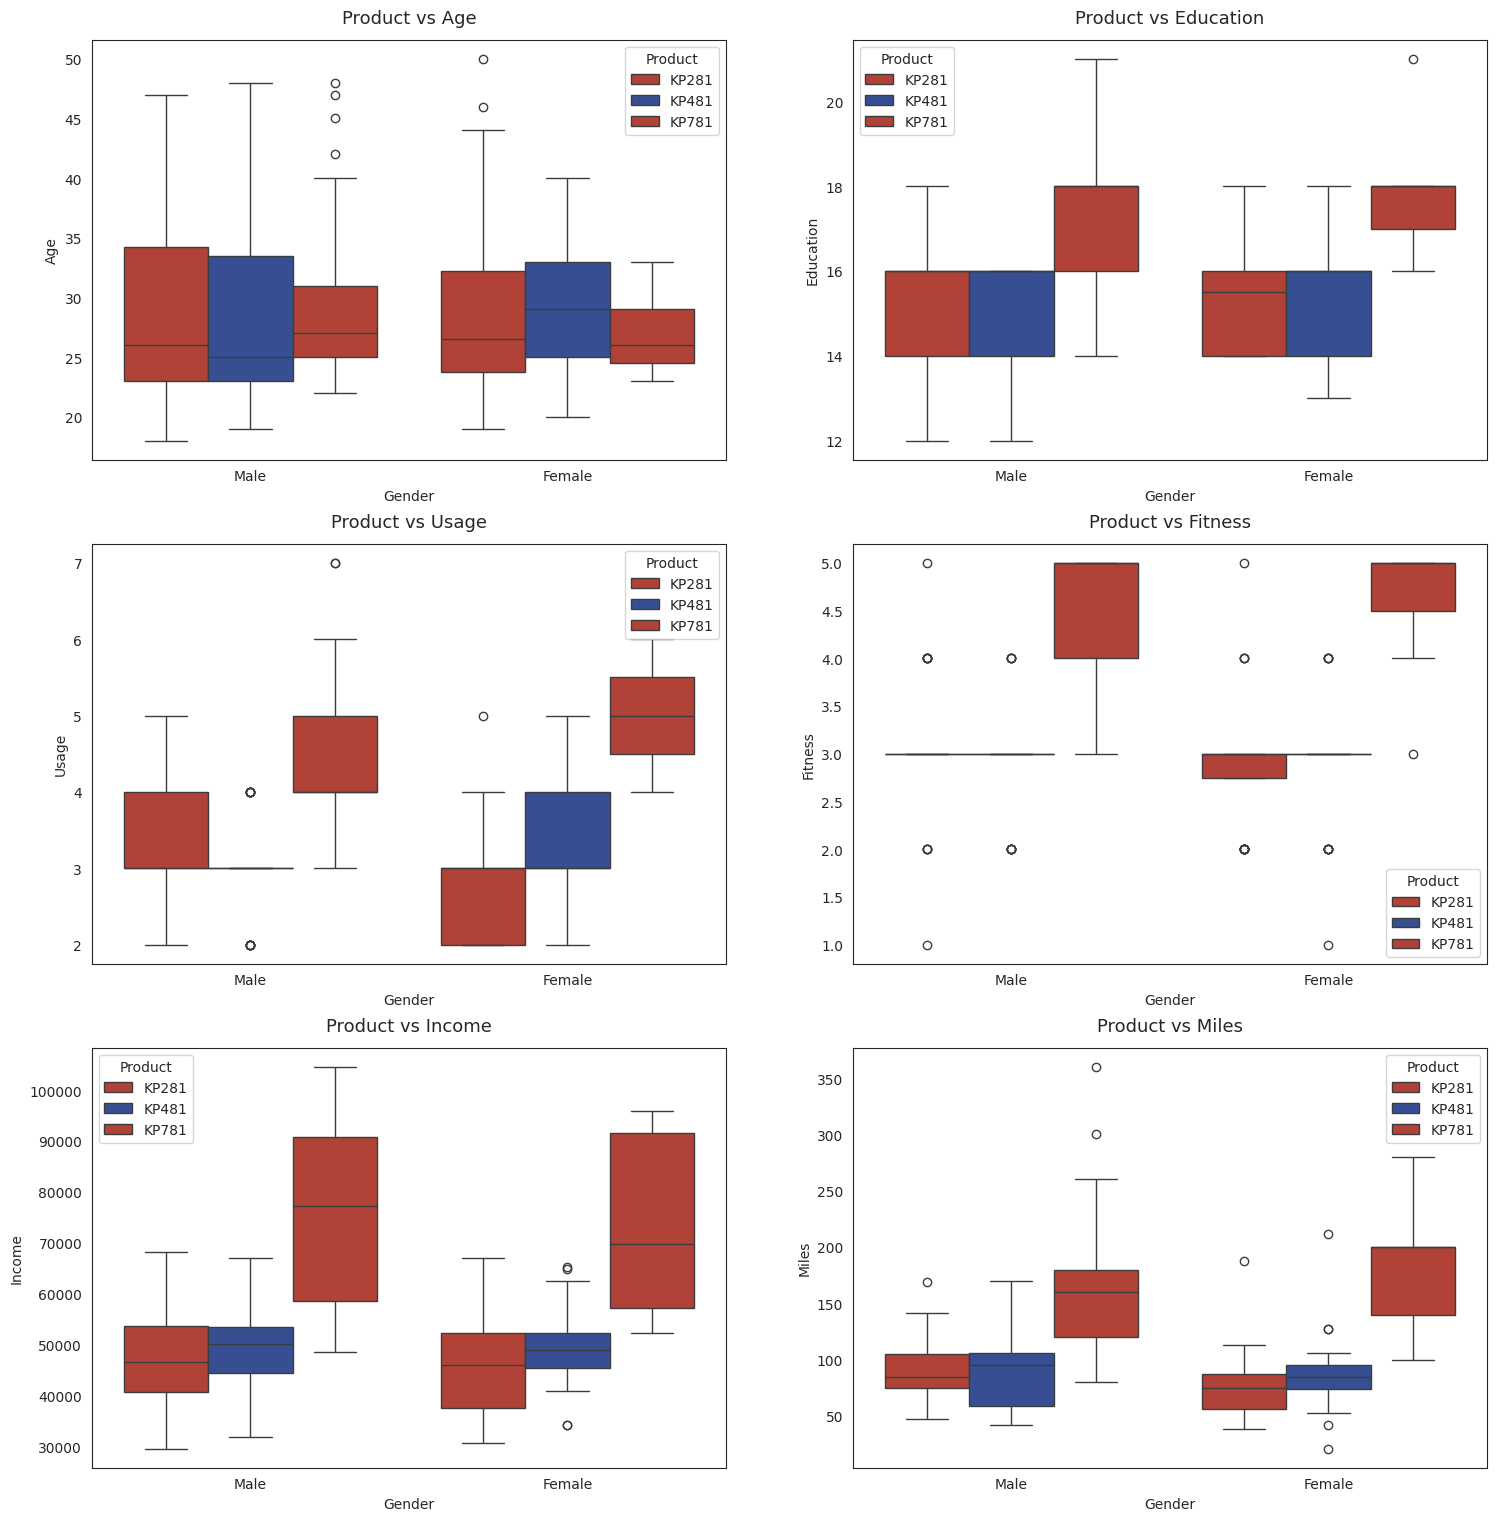

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df_treadmill, x='Gender', y=attrs[count], hue='Product', ax=axs[i,j], palette=['#c43123','#2746a1'])
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

**Obervations**
**Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product**

## Checking Correlation among Different Factors

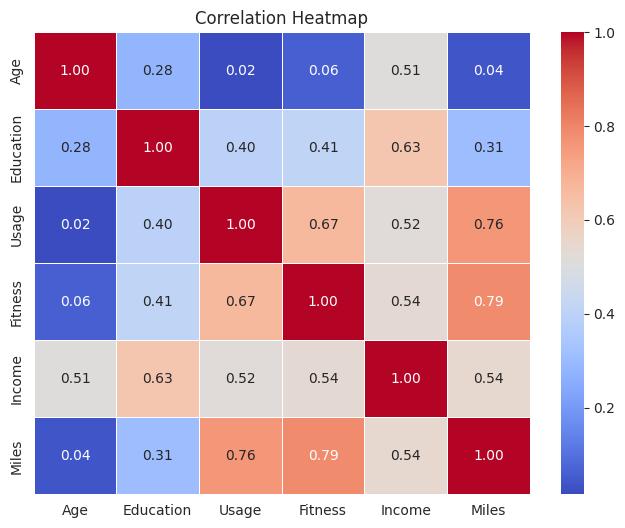

In [ ]:
# correlation matrix for numeric columns
numeric_columns = df_treadmill.select_dtypes(include='number').columns
correlation_matrix = df_treadmill[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Insight: Most of correlation we can see arround **
1. **Miles--Usage**
2. **Miles--Fitness**
3. **Fitness--Usage**
4. **Education--Income**

#Conditional probability

**In this case, we have calculated the:**

1. **Conditional Probability of purchasing each product given the gender - P(KP281 | male), P(KP281 | female), P(KP481 | male), P(KP481 | female),
P(KP781 | male), P(KP781 | female)**

2. **Conditional Probability of purchasing each product given marital status - P(KP281 | married), P(KP281 | single), P(KP481 | married), P(KP481 | single), P(KP781 | married), P(KP281 | single)**

3. **Conditional Probability of purchasing each product given education**

4. **Conditional Probability of purchasing each product given fitness**

In [ ]:
# Conditional Probability of purchasing each product given gender
conditional_prob_gender_product = pd.crosstab(index=df_treadmill['Gender'], columns=df_treadmill['Product'], normalize='index')
print("\nConditional Probability of purchasing each product given gender:")
print(conditional_prob_gender_product)

# Conditional Probability of purchasing each product given marital status
conditional_prob_marital_product = pd.crosstab(index=df_treadmill['MaritalStatus'], columns=df_treadmill['Product'], normalize='index')
print("\n\nConditional Probability of purchasing each product given marital status:")
print(conditional_prob_marital_product)

# Conditional Probability of purchasing each product given education
conditional_prob_education_product = pd.crosstab(index=df_treadmill['Education'], columns=df_treadmill['Product'], normalize='index')
print("\n\nConditional Probability of purchasing each product given education:")
print(conditional_prob_education_product)

# Conditional Probability of purchasing each product given fitness
conditional_prob_fitness_product = pd.crosstab(index=df_treadmill['Fitness'], columns=df_treadmill['Product'], normalize='index')
print("\n\nConditional Probability of purchasing each product given fitness status:")
print(conditional_prob_fitness_product)


Conditional Probability of purchasing each product given gender:
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308


Conditional Probability of purchasing each product given marital status:
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877


Conditional Probability of purchasing each product given education:
Product       KP281     KP481     KP781
Education                              
12         0.666667  0.333333  0.000000
13         0.600000  0.400000  0.000000
14         0.545455  0.418182  0.036364
15         0.800000  0.200000  0.000000
16         0.458824  0.364706  0.176471
18         0.086957  0.086957  0.826087
20         0.000000  0.000000  1.000000
21         0.000000  0.000000  1.000000


Conditional Probability of purchasing each product given fi

# Two-Way contingency

In [ ]:
df_KP281=df_treadmill[df_treadmill['Product']=='KP281']
# Contingency table for Product KP281
contingency_table_KP281 = pd.crosstab(index = df_KP281['Gender'],
                                      columns = df_KP281['MaritalStatus'],
                                      margins = True,
                                      margins_name = 'Total')
conditional_prob_KP281 = contingency_table_KP281 / contingency_table_KP281.loc['Total', 'Total']
print("Contingency Table for Product KP281:")
print(contingency_table_KP281)
print("\nMarginal Probabilities for KP281:")
print(contingency_table_KP281 / len(df_KP281))  # Marginal probabilities

Contingency Table for Product KP281:
MaritalStatus  Partnered  Single  Total
Gender                                 
Female                27      13     40
Male                  21      19     40
Total                 48      32     80

Marginal Probabilities for KP281:
MaritalStatus  Partnered  Single  Total
Gender                                 
Female            0.3375  0.1625    0.5
Male              0.2625  0.2375    0.5
Total             0.6000  0.4000    1.0


In [ ]:
df_KP481=df_treadmill[df_treadmill['Product']=='KP481']
# Contingency table for Product KP481
contingency_table_KP481 = pd.crosstab(index = df_KP481['Gender'],
                                      columns = df_KP481['MaritalStatus'],
                                      margins = True,
                                      margins_name = 'Total')
conditional_prob_KP481 = contingency_table_KP481 / contingency_table_KP481.loc['Total', 'Total']
print("Contingency Table for Product KP481:")
print(contingency_table_KP481)
print("\nMarginal Probabilities for KP481:")
print(contingency_table_KP481 / len(df_KP481))  # Marginal probabilities

Contingency Table for Product KP481:
MaritalStatus  Partnered  Single  Total
Gender                                 
Female                15      14     29
Male                  21      10     31
Total                 36      24     60

Marginal Probabilities for KP481:
MaritalStatus  Partnered    Single     Total
Gender                                      
Female              0.25  0.233333  0.483333
Male                0.35  0.166667  0.516667
Total               0.60  0.400000  1.000000


In [ ]:
df_KP781=df_treadmill[df_treadmill['Product']=='KP781']
# Contingency table for Product KP781
contingency_table_KP781 = pd.crosstab(index = df_KP781['Gender'],
                                      columns = df_KP781['MaritalStatus'],
                                      margins = True,
                                      margins_name = 'Total')
conditional_prob_KP781 = contingency_table_KP781 / contingency_table_KP781.loc['Total', 'Total']
# Display results for KP781
print("\nConditional Probabilities for KP781:")
print(conditional_prob_KP781)
print("\nMarginal Probabilities for KP781:")
print(contingency_table_KP781 / len(df_KP781))  # Marginal probabilities


Conditional Probabilities for KP781:
MaritalStatus  Partnered  Single  Total
Gender                                 
Female             0.100   0.075  0.175
Male               0.475   0.350  0.825
Total              0.575   0.425  1.000

Marginal Probabilities for KP781:
MaritalStatus  Partnered  Single  Total
Gender                                 
Female             0.100   0.075  0.175
Male               0.475   0.350  0.825
Total              0.575   0.425  1.000


**What is P(Single | KP281) i.e. product bought is KP281 what is the probability that this person is single?**

In [ ]:
df_treadmill[(df_treadmill['Product']=='KP281')]['MaritalStatus'].value_counts(normalize=True)

,proportion
MaritalStatus,
Partnered,0.6
Single,0.4


**What is P(Single | KP481) i.e. product bought is KP481 what is the probability that this person is single?**

In [ ]:
df_treadmill[(df_treadmill['Product']=='KP481')]['MaritalStatus'].value_counts(normalize=True)

,proportion
MaritalStatus,
Partnered,0.6
Single,0.4


**What is P(Single | KP781) i.e. product bought is KP781 what is the probability that this person is single?**

In [ ]:
df_treadmill[(df_treadmill['Product']=='KP781')]['MaritalStatus'].value_counts(normalize=True)

,proportion
MaritalStatus,
Partnered,0.575
Single,0.425


**What is P(Purchase | Male) i.e. for each product bought what is the probability that a male buys it?**

In [ ]:
df_treadmill[(df_treadmill['Gender']=='Male')]['Product'].value_counts(normalize=True)

,proportion
Product,
KP281,0.384615
KP781,0.317308
KP481,0.298077


**What is P(Purchase | Female) i.e. for each product bought what is the probability that a female buys it?**

In [ ]:
df_treadmill[(df_treadmill['Gender']=='Female')]['Product'].value_counts(normalize=True)

,proportion
Product,
KP281,0.526316
KP481,0.381579
KP781,0.092105


**Probability of a Male and Female Customers Buying a KP281 Treadmill**

In [ ]:
male_kp281_prob = df_treadmill[(df_treadmill['Gender'] == 'Male') & (df_treadmill['Product'] == 'KP281')].shape[0] / df_treadmill[df_treadmill['Gender'] == 'Male'].shape[0]
female_kp281_prob = df_treadmill[(df_treadmill['Gender'] == 'Female')&(df_treadmill['Product'] == 'KP281')].shape[0]/df_treadmill[df_treadmill['Gender'] == 'Female'].shape[0]

print(f"\nProbability of a Male customer buying a KP281 treadmill: {male_kp281_prob:.2f}")
print(f"Probability of a Female customer buying a KP281 treadmill: {female_kp281_prob:.2f}")


Probability of a Male customer buying a KP281 treadmill: 0.38
Probability of a Female customer buying a KP281 treadmill: 0.53


**Insight: P(male buying KP281) = 0.38. P(female buying KP281) = 0.53. We note that there are very high chances that a female will buy KP281 as compared to KP481 and KP781.**

**Probability of a Male and Female Customer Buying a KP481 Treadmill**

In [ ]:
male_kp481_prob  = df_treadmill[(df_treadmill['Gender'] == 'Male') & (df_treadmill['Product'] == 'KP481')].shape[0] / df_treadmill[df_treadmill['Gender'] == 'Male'].shape[0]
female_kp481_prob  = df_treadmill[(df_treadmill['Gender'] == 'Female')&(df_treadmill['Product'] == 'KP481')].shape[0]/df_treadmill[df_treadmill['Gender'] == 'Female'].shape[0]

print(f"\nProbability of a Male customer buying a KP481 treadmill: {male_kp481_prob:.2f}")
print(f"Probability of a Female customer buying a KP481 treadmill: {female_kp481_prob:.2f}")


Probability of a Male customer buying a KP481 treadmill: 0.30
Probability of a Female customer buying a KP481 treadmill: 0.38


**Insight: P(male buying KP481) = 0.30. P(female buying KP481) = 0.38.**

**Probability of a Male and Female Customer Buying a KP781 Treadmill**

In [ ]:
male_kp781_prob = df_treadmill[(df_treadmill['Gender'] == 'Male') & (df_treadmill['Product'] == 'KP781')].shape[0] / df_treadmill[df_treadmill['Gender'] == 'Male'].shape[0]
female_kp781_prob = df_treadmill[(df_treadmill['Gender'] == 'Female')&(df_treadmill['Product'] == 'KP781')].shape[0]/df_treadmill[df_treadmill['Gender'] == 'Female'].shape[0]

print(f"\nProbability of a Male customer buying a KP781 treadmill: {male_kp781_prob:.2f}")
print(f"Probability of a Female customer buying a KP781 treadmill: {female_kp781_prob:.2f}")


Probability of a Male customer buying a KP781 treadmill: 0.32
Probability of a Female customer buying a KP781 treadmill: 0.09


**Insight: P(male buying KP781) = 0.32. P(female buying KP781) = 0.09. We note that there are very less chances that a female will buy KP781 as compared to KP281 and KP481.as we have seen in before comparisons**

**Overall probability of purchase for each treadmill**

In [ ]:
total_customers=len(df_treadmill)

# Probability of Purchase for KP281
prob_purchase_kp281 = len(df_treadmill[df_treadmill['Product'] == 'KP281']) / total_customers

# Probability of Purchase for KP481
prob_purchase_kp481 = len(df_treadmill[df_treadmill['Product'] == 'KP481']) / total_customers

# Probability of Purchase for KP781
prob_purchase_kp781 = len(df_treadmill[df_treadmill['Product'] == 'KP781']) / total_customers

print(f"Overall Probability of Purchase for KP281: {prob_purchase_kp281:.2f}")
print(f"Overall Probability of Purchase for KP481: {prob_purchase_kp481:.2f}")
print(f"Overall Probability of Purchase for KP781: {prob_purchase_kp781:.2f}")

Overall Probability of Purchase for KP281: 0.44
Overall Probability of Purchase for KP481: 0.33
Overall Probability of Purchase for KP781: 0.22


**Insight: P(KP281) = 0.44, P(KP481) = 0.33, P(K781) = 0.22.**

# Outlier Detection

   ## Detecting Outliers using describe method

In [ ]:
# Use describe method to get summary statistics
summary_stats = df_treadmill.describe()

# Calculate the interquartile range (IQR)
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Align the DataFrame and perform the comparison
df_aligned, lower_bound_aligned = df_treadmill.align(lower_bound, axis=1, join='outer')
df_aligned, upper_bound_aligned = df_treadmill.align(upper_bound, axis=1, join='outer')

# Identify outliers
outliers = (df_aligned < lower_bound_aligned) | (df_aligned > upper_bound_aligned)

# Display the outliers
print("Outliers:")
print(outliers.sum())

Outliers:
Age               5
Education         4
Fitness           2
Gender            0
Income           19
MaritalStatus     0
Miles            13
Product           0
Usage             9
dtype: int64


# Customer Profiling - Categorization of users

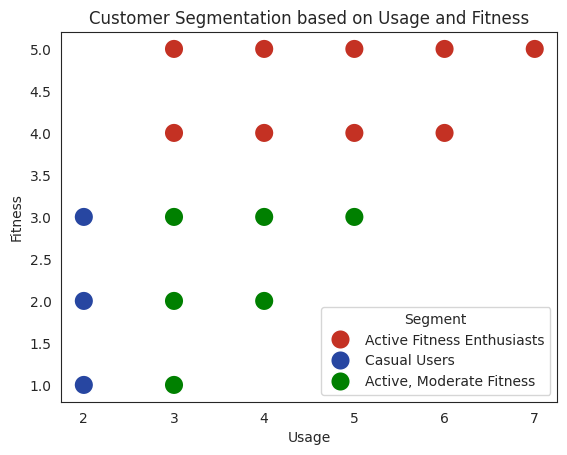

In [ ]:
# Create segments based on Usage and Fitness
# We can customize these criteria based on your business goals
df_treadmill['Segment'] = 'Undecided'
df_treadmill.loc[(df_treadmill['Usage'] >= 3) & (df_treadmill['Fitness'] >= 4), 'Segment'] = 'Active Fitness Enthusiasts'
df_treadmill.loc[(df_treadmill['Usage'] >= 3) & (df_treadmill['Fitness'] < 4), 'Segment'] = 'Active, Moderate Fitness'
df_treadmill.loc[df_treadmill['Usage'] < 3, 'Segment'] = 'Casual Users'

# Visualize the segments
plt.figure()
sns.scatterplot(x='Usage', y='Fitness', hue='Segment', data=df_treadmill, palette=['#c43123','#2746a1','g'], s=200)
plt.title('Customer Segmentation based on Usage and Fitness')
plt.show()

In [ ]:
# Analyze the segments
segment_analysis = df_treadmill.groupby('Segment').agg({
    'Usage': ['mean', 'std'],
    'Fitness': ['mean', 'std'],
    'Product': 'count'
}).reset_index()

segment_analysis.columns = ['Segment', 'Avg_Usage', 'Std_Usage', 'Avg_Fitness', 'Std_Fitness', 'Customer_Count']

print("\nSegment Analysis:")
print(segment_analysis)


Segment Analysis:
                      Segment  Avg_Usage  Std_Usage  Avg_Fitness  Std_Fitness  \
0  Active Fitness Enthusiasts   4.436364   1.067424     4.563636     0.500505   
1    Active, Moderate Fitness   3.391304   0.533628     2.847826     0.390401   
2                Casual Users   2.000000   0.000000     2.515152     0.565752   

   Customer_Count  
0              55  
1              92  
2              33  


**Insight: Most of our customers are active, moderate fitness users, followed by casual users and athletes.**

  ## Customer Profiles for Each Product

In [ ]:
# Filter the DataFrame for each product
kp281_data = df_treadmill[df_treadmill['Product'] == 'KP281']
kp481_data = df_treadmill[df_treadmill['Product'] == 'KP481']
kp781_data = df_treadmill[df_treadmill['Product'] == 'KP781']

# Define a function to calculate customer profiles
def calculate_customer_profile(data, product_name):
    avg_age = data['Age'].mean()
    avg_usage = data['Usage'].mean()
    avg_fitness = data['Fitness'].mean()
    avg_income = data['Income'].mean()
    avg_miles = data['Miles'].mean()
    customer_count = len(data)

    return {
        'Product': product_name,
        'Avg_Age': avg_age,
        'Avg_Usage': avg_usage,
        'Avg_Fitness': avg_fitness,
        'Avg_Income': avg_income,
        'Avg_Miles': avg_miles,
        'Customer_Count': customer_count
    }

# Calculate customer profiles for each product
kp281_profile = calculate_customer_profile(kp281_data, 'KP281')
kp481_profile = calculate_customer_profile(kp481_data, 'KP481')
kp781_profile = calculate_customer_profile(kp781_data, 'KP781')

# Create a DataFrame with the profiles
product_profiles = pd.DataFrame([kp281_profile, kp481_profile, kp781_profile])

print("\nCustomer Profiles for Each Product:")
print(product_profiles)


Customer Profiles for Each Product:
  Product  Avg_Age  Avg_Usage  Avg_Fitness  Avg_Income   Avg_Miles  \
0   KP281    28.55   3.087500       2.9625   46418.025   82.787500   
1   KP481    28.90   3.066667       2.9000   48973.650   87.933333   
2   KP781    29.10   4.775000       4.6250   75441.575  166.900000   

   Customer_Count  
0              80  
1              60  
2              40  


  ## Descriptive Analytics - Customer Profile for Age

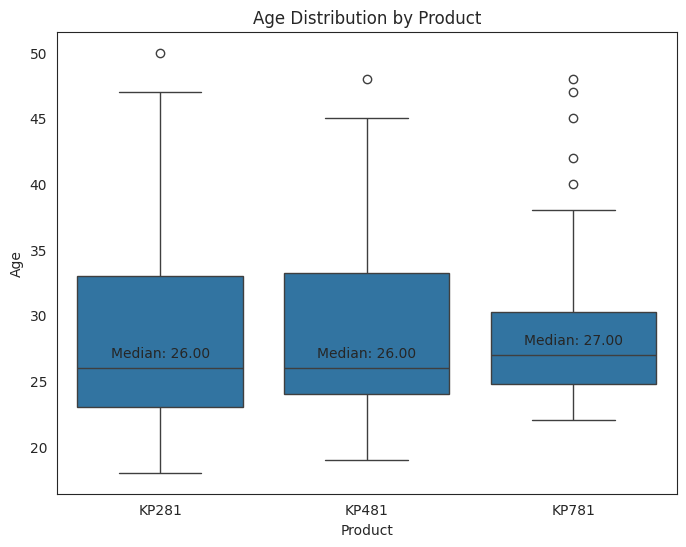

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Product', y='Age', data=df_treadmill)
plt.title('Age Distribution by Product')

# Add annotations for median values
for product in df_treadmill['Product'].unique():
    y_values = df_treadmill[df_treadmill['Product'] == product]['Age']
    median_val = y_values.median()

    plt.annotate(f'Median: {median_val:.2f}',
                 xy=(df_treadmill['Product'].unique().tolist().index(product), median_val),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom')
plt.show()

  ## Descriptive Analytics - Customer Profile for Gender

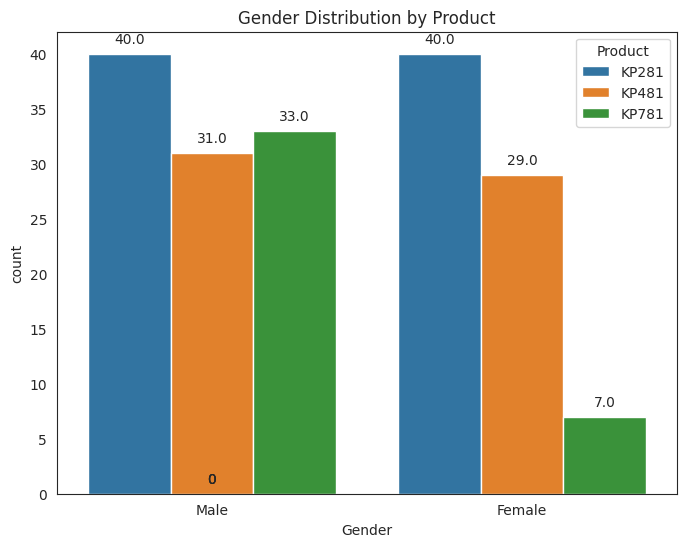

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', hue='Product', data=df_treadmill)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Gender Distribution by Product')
plt.show()

**Insight: We note that there are very less female customers buying KP781 as compared to KP281 and KP481.**

  ## Descriptive Analytics - Customer Profile for Education

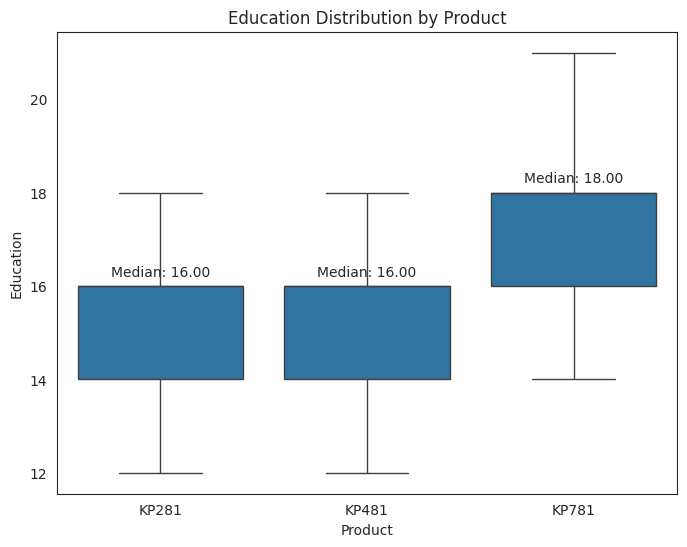

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Product', y='Education', data=df_treadmill)
plt.title('Education Distribution by Product')

# Add annotations for median values
for product in df_treadmill['Product'].unique():
    y_values = df_treadmill[df_treadmill['Product'] == product]['Education']
    median_val = y_values.median()

    plt.annotate(f'Median: {median_val:.2f}',
                 xy=(df_treadmill['Product'].unique().tolist().index(product), median_val),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

**Insight: We note that we have more educated customers buying KP781 as compared to KP281 and KP481.**

  ## Descriptive Analytics - Customer Profile for Marital Status

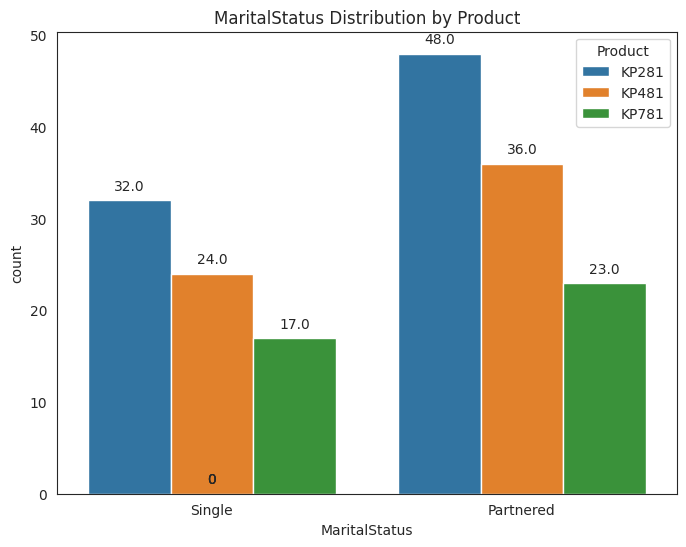

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'MaritalStatus', hue = 'Product', data = df_treadmill)
plt.title('MaritalStatus Distribution by Product')

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

**Insight: We note that married customers are buying all three products more as compared to single customers.**

  ## Descriptive Analytics - Customer Profile for Usage

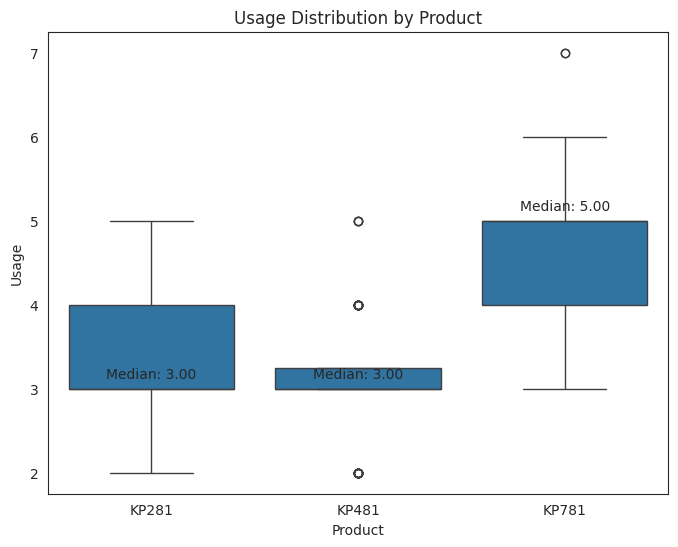

In [ ]:
plt.figure(figsize = (8, 6))
ax = sns.boxplot(x = 'Product', y = 'Usage', data = df_treadmill)
plt.title('Usage Distribution by Product')

# Add annotations for median values
for product in df_treadmill['Product'].unique():
    y_values = df_treadmill[df_treadmill['Product'] == product]['Usage']
    median_val = y_values.median()

    plt.annotate(f'Median: {median_val:.2f}',
                 xy = (df_treadmill['Product'].unique().tolist().index(product), median_val),
                 xytext = (0, 5),
                 textcoords = 'offset points',
                 ha = 'center', va = 'bottom')

plt.show()

**Insight: We note that customers buying KP781 intend to use the product more regularly as compared to customers buying KP281 and KP481. We can infer that customer base of KP781 are active fitness enthusiasts or athletes.**

  ## Descriptive Analytics - Customer Profiles for KP281 based on gender and marital status

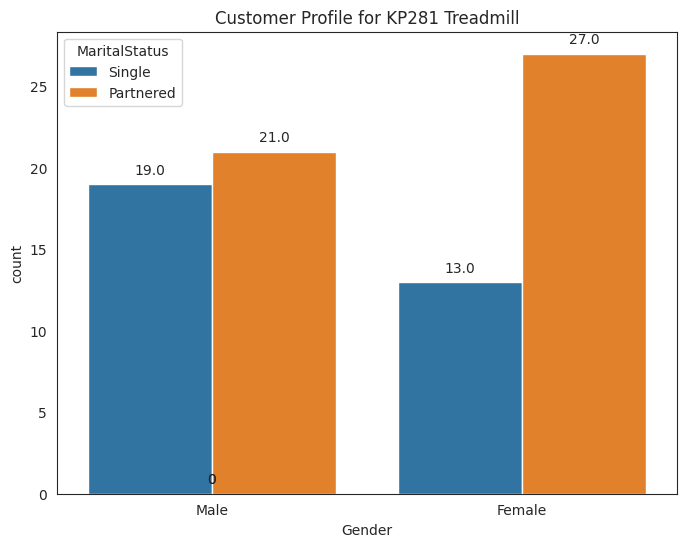

In [ ]:
# Filter data for KP281 treadmills
df_kp281 = df_treadmill[df_treadmill['Product'] == 'KP281']

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Gender', hue = 'MaritalStatus', data = df_kp281)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Customer Profile for KP281 Treadmill')
plt.show()

  ## Descriptive Analytics - Customer Profiles for KP281 based on income

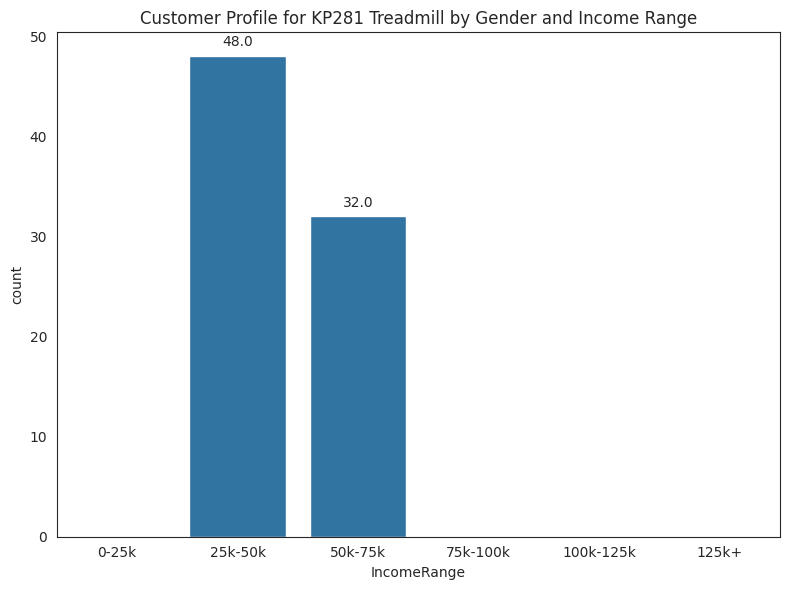

In [ ]:
# Filter data for KP481 treadmills
df_kp281 = df_treadmill[df_treadmill['Product'] == 'KP281']

# Define income bins
income_bins = [0, 25000, 50000, 75000, 100000, 125000, np.inf]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k+']

# Bin the income data
df_kp281['IncomeRange'] = pd.cut(df_kp281['Income'], bins=income_bins, labels=income_labels, right=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='IncomeRange', data=df_kp281, order=income_labels)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Customer Profile for KP281 Treadmill by Gender and Income Range')
plt.tight_layout()
plt.show()

**Insight: We note that most customers buying KP281 fall under 25,000 - 50,000 dollars annual income bracket. So, if we offer them some discounts or offers, they can shift to KP481.**

  ## Descriptive Analytics - Customer Profiles for KP481 based on gender and marital status

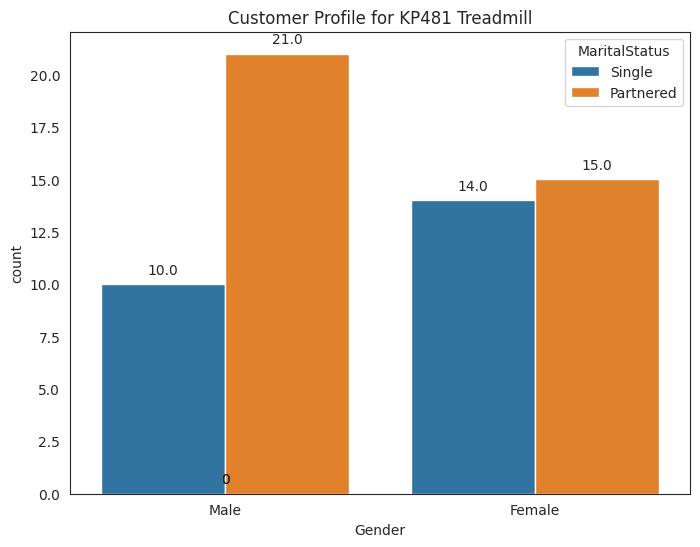

In [ ]:
# Filter data for KP281 treadmills
df_kp481 = df_treadmill[df_treadmill['Product'] == 'KP481']

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Gender', hue = 'MaritalStatus', data = df_kp481)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Customer Profile for KP481 Treadmill')
plt.show()

  ## Descriptive Analytics - Customer Profiles for KP481 based on income

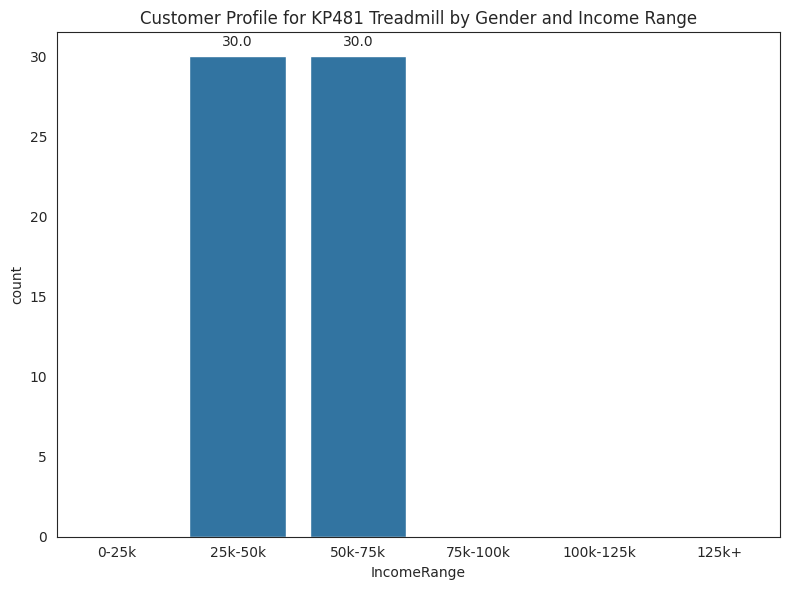

In [ ]:
# Filter data for KP481 treadmills
df_kp481 = df_treadmill[df_treadmill['Product'] == 'KP481']

# Define income bins
income_bins = [0, 25000, 50000, 75000, 100000, 125000, np.inf]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k+']

# Bin the income data
df_kp481['IncomeRange'] = pd.cut(df_kp481['Income'], bins=income_bins, labels=income_labels, right=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='IncomeRange', data=df_kp481, order=income_labels)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Customer Profile for KP481 Treadmill by Gender and Income Range')
plt.tight_layout()
plt.show()

**Insight: We note that 50% customers buying KP481 fall under 50,000 - 75,000 dollars annual income bracket. So, if we offer them some discounts or offers, they can shift to KP781.**

  ## Descriptive Analytics - Customer Profiles for KP781 based on gender and marital status

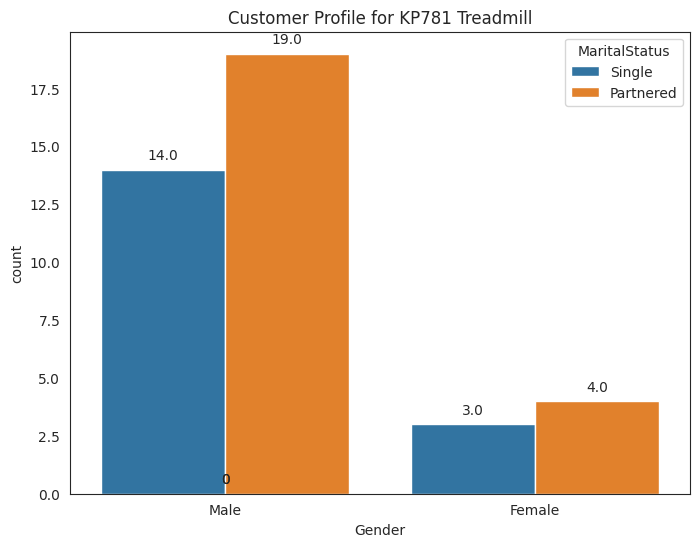

In [ ]:
# Filter data for KP781 treadmills
df_kp781 = df_treadmill[df_treadmill['Product'] == 'KP781']

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Gender', hue = 'MaritalStatus', data = df_kp781)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Customer Profile for KP781 Treadmill')
plt.show()

  ## Descriptive Analytics - Customer Profiles for KP781 based on income



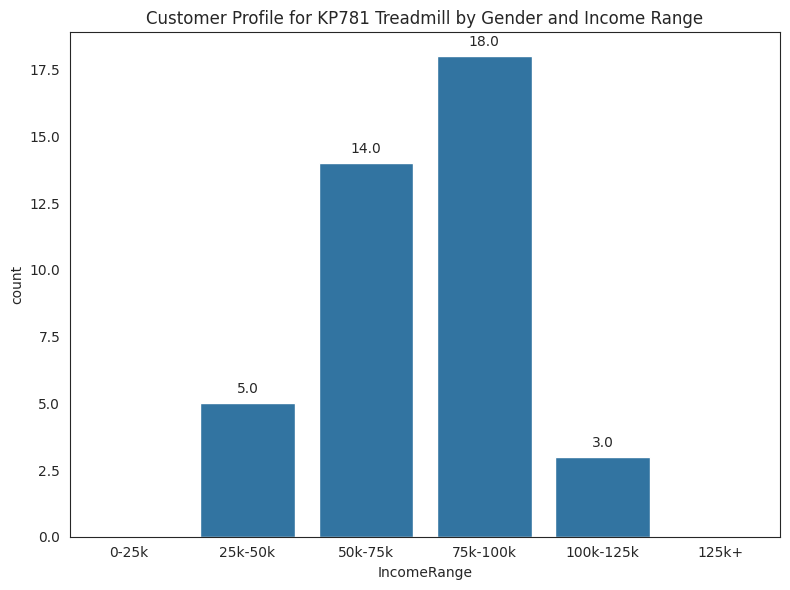

In [ ]:
# Filter data for KP481 treadmills
df_kp781 = df_treadmill[df_treadmill['Product'] == 'KP781']

# Define income bins
income_bins = [0, 25000, 50000, 75000, 100000, 125000, np.inf]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k+']

# Bin the income data
df_kp781['IncomeRange'] = pd.cut(df_kp781['Income'], bins=income_bins, labels=income_labels, right=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='IncomeRange', data=df_kp781, order=income_labels)

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Customer Profile for KP781 Treadmill by Gender and Income Range')
plt.tight_layout()
plt.show()

# Business recommedations
  #  8.1 Customer Engagement:
      We should focus on age-specific marketing campaigns to target and engage customers in the 20-35 age range, as this group shows highest interest in all our treadmills.
      Most of our KP281 and KP481 treadmill customers fall in 20-35 age range whereas our KP781 treadmill customers fall in 25-30 age range.
      Average age of our customers is 28.79 years and median age is 26.0 years.
      We should also focus on marketing campaigns to target and engage married customers as they are more than single customers.
      For our KP781, we have very less female customers, so we can introduce some deals or discounts so that more females who are atletes but our KP781.
  #   8.2 Focus on each treadmill model:
      We must focus on treadmill-model-specific marketing campaigns to target and engage customers of each model.
      44.44% of our customers are KP281 buyers, 33.33% are KP481 buyers and 22.22% are KP781 buyers.
      Whereas generally customers of KP781 (which is our highest priced product) are having more than 50,000 dollars annual income and are mostly active fitness enthusiasts or athletes.
      So we have balanced customer base for each treadmill model, and therfore marketing and attention to each treadmill model is equally important.
  #   8.3 Promote Fitness Features:
      We must consider developing and promoting treadmill features that cater to customers with fitness levels of 3 or more, as they represent a significant portion of the market.
      Most of our consumers have moderate to high level of fitness.
      For our KP781 model, buyers are mostly athletes or active fitness enthusiasts, so we can promote our KP781 model's features more to such cutomers so that its sales can increase.
  #   8.4 Advertise Usage Scenarios:
      We can create promotional materials highlighting the durability and features suitable for customers planning to use treadmills intensively (Usage level 3 or more).
      Most of our consumers intend to use treadmill 3 times a week or more.
  #  8.5 Affordability Awareness:
      We need to leverage messaging that emphasizes affordability to appeal to customers with incomes of 50,000 dollars or more, ensuring they are aware of the budget-friendly options available.
      Most of our KP281 and KP481 treadmill consumers fall in 40,000 - 60,000 dollars annual income bracket, but our KP781 treadmill customers fall in 60,000 - 90,000 dollars annual income bracket.
      We note that most customers buying KP281 fall under 25,000 - 50,000 dollars annual income bracket. So, if we offer them some discounts or offers, they can shift to KP481.
      We note that 50% customers buying KP481 fall under 50,000 - 75,000 dollars annual income bracket. So, if we offer them some discounts or offers, they can shift to KP781.
  #  8.6 Inclusive Marketing:
      We must ensure that our marketing materials represent and speak to both genders, acknowledging the fact that we have a diverse customer base in terms of gender.
      We can focus more on sales to female customers because they are little less in number than male customers.
#  8.7 Personalized Recommendations:
      We can implement a recommendation system or personalized customer outreach to suggest treadmills based on individual preferences and needs.